# 3.1

In [235]:
import scipy.io as scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [248]:
# PRINcipal COMPonent calculator
#   Calculates the principal components of a collection of points.
# Input:
#   X - D-by-N data matrix of N points in D dimensions.
# Output:
#   W - A D-by-M matrix containing the M principal components of the data.
#   Z - A M-by-N matrix containing the latent variables of the data.
#   mu - A D-by-1 vector containing the mean of the data.
#   lambda - A vector containing the eigenvalues associated with the above principal components.

def pca(X, M):
    mu = np.sum(X, axis = 1)/X.shape[1]
    X_centered = np.transpose(X) - mu
    S = np.matmul(np.transpose(X_centered), X_centered) / len(X)
    eig_vals_and_vecs = np.linalg.eigh(S)
    eig_vals = eig_vals_and_vecs[0]
    eig_vecs = eig_vals_and_vecs[1]
    top_M_eigs_inds = np.argpartition(eig_vals, -M)[-M:][::-1]
    lambdas = eig_vals[top_M_eigs_inds]
    W = eig_vecs[top_M_eigs_inds]
    Z = np.matmul(W, np.transpose(np.subtract(mu, np.transpose(X)))) / M

    d = dict()
    d['W'] = W
    d['Z'] = Z
    d['mu'] = mu
    d['lambda'] = lambdas

    return d


# 3.2

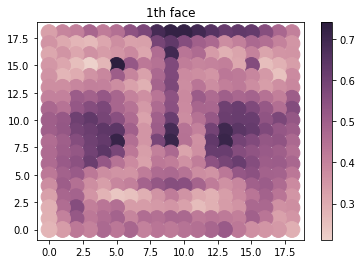

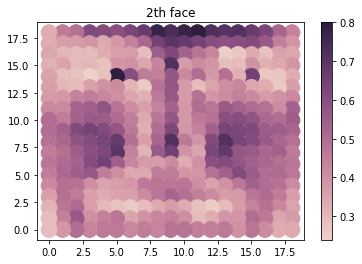

In [249]:
cbcl = scipy.loadmat('/Users/wyattmadden/Documents/school/' + 
                     'MSU/2020/spring/m508/lab_info/lab_3/cbcl.mat',
                    squeeze_me = True)

X = cbcl['X']

x_axis_points = np.repeat(list(range(X_shaped.shape[0] - 1, -1, -1)), 
                          X_shaped.shape[0])
y_axis_points = np.tile(list(range(X_shaped.shape[0] - 1, -1, -1)), 
                        X_shaped.shape[0])

def plot_19_grid(colour, title):
    cmap = sns.cubehelix_palette(as_cmap=True)
    f, ax = plt.subplots()
    points = ax.scatter(x_axis_points, 
                        y_axis_points, 
                        c = colour,
                        s = 250, 
                        cmap = cmap) 
    f.colorbar(points)
    ax.set_title(title)

for i in range(0, 2):
    one_face = X[:, i]
    X_shaped = np.reshape(X, (int(np.sqrt(X.shape[0])), 
                              int(np.sqrt(X.shape[0])), 
                              X.shape[1]))
    
    plot_19_grid(one_face, str(i + 1) + "th face")

# 3.3 

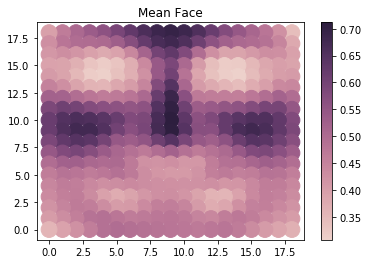

In [250]:
five_face = pca(X, 5)

mean_face = five_face['mu']

plot_19_grid(mean_face, "Mean Face")
    

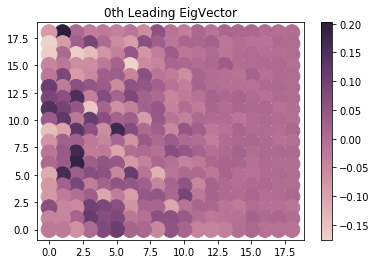

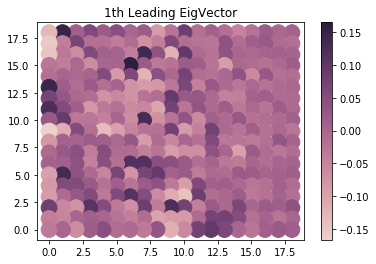

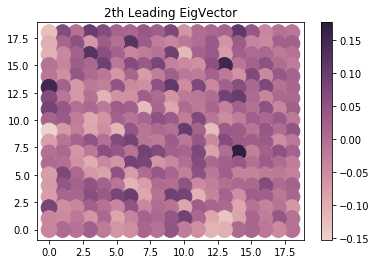

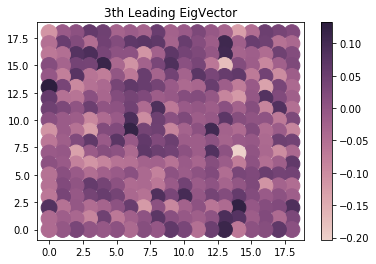

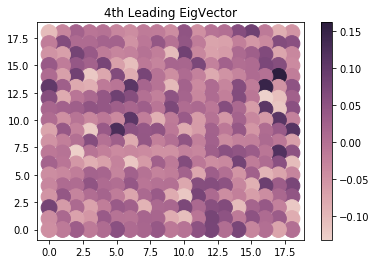

In [251]:
lead_5_eig_vecs = five_face['W']
lead_5_eig_vals = five_face['lambda']

iter = 0
for i in lead_5_eig_vecs:
    plot_19_grid(i, str((iter)) + "th Leading EigVector")
    iter += 1

# 3.4

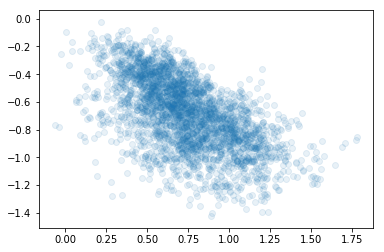

In [240]:
two_face = pca(X, 2)
lead_2_eig_vecs = two_face['W']
lead_2_eig_vals = two_face['lambda']

two_dim_red = np.matmul(lead_2_eig_vecs, X)

f, ax = plt.subplots()
points = ax.scatter(two_dim_red[0], 
                    two_dim_red[1],
                   alpha = 0.1)
